In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch.unitroot import ADF, PhillipsPerron
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
household_power_consumption = pd.read_csv("household_power_consumption.txt", sep=';',
                                                parse_dates={'DateTime' : ['Date', 'Time']}, 
                                                index_col=["DateTime"],
                                                dayfirst=True,
                                                low_memory=False,
                                                na_values=['nan','?'])


In [3]:
household_power_consumption = household_power_consumption[household_power_consumption.index.year > 2006]
household_power_consumption = household_power_consumption.fillna(method='ffill')

In [4]:
household_power_consumption = household_power_consumption["Global_active_power"]
daily = household_power_consumption.resample("D").mean()
weekly = household_power_consumption.resample("W").mean()
monthly = household_power_consumption.resample("M").mean()
quarterly = household_power_consumption.resample("3M").mean()

[]

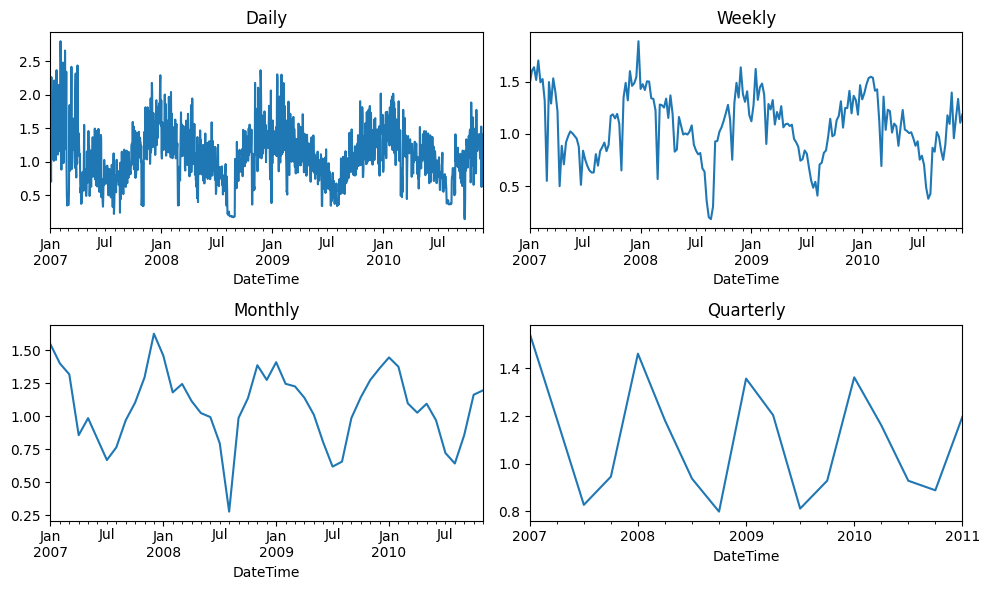

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
daily.plot(y="Global_active_power", ax=axes[0,0], title="Daily")
weekly.plot(y="Global_active_power", ax=axes[0,1], title="Weekly")
monthly.plot(y="Global_active_power", ax=axes[1,0], title="Monthly")
quarterly.plot(y="Global_active_power", ax=axes[1,1], title="Quarterly")
plt.tight_layout()
plt.plot()

In [6]:
def decompose(time_period, period):
    decomposition = sm.tsa.seasonal_decompose(time_period, model='additive', period=period)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
    axes[0].plot(decomposition.trend)
    axes[0].set_title("Trend")
    axes[1].plot(decomposition.seasonal)
    axes[1].set_title("Seasonality")
    axes[2].plot(decomposition.resid)
    axes[2].set_title("Residual")
    plt.tight_layout()
    plt.plot()
    print(ADF(decomposition.resid.dropna()))
    print(PhillipsPerron(decomposition.resid.dropna()))

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.146
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.861
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


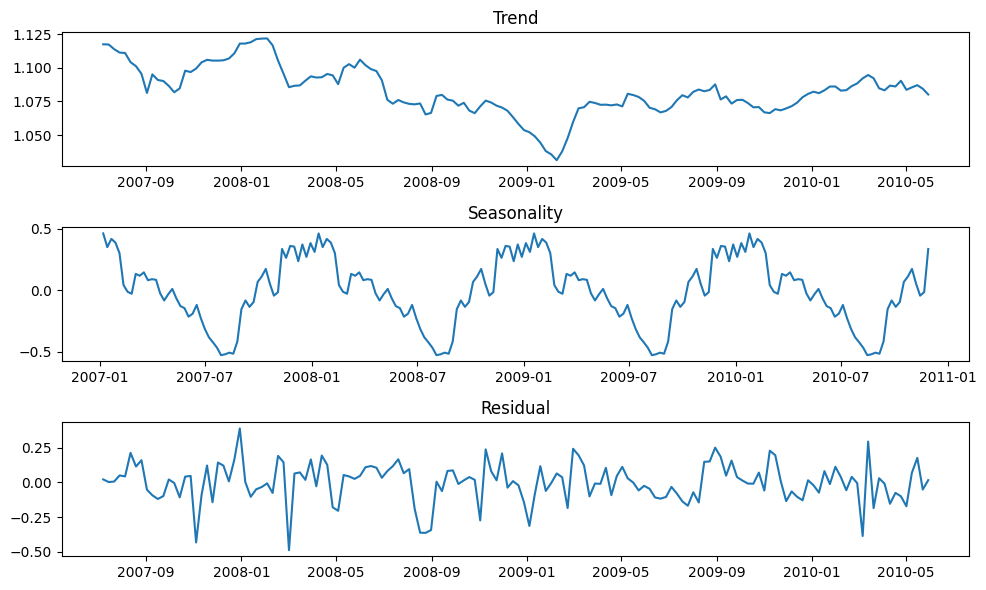

In [7]:
decompose(weekly, 53)

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.640
P-value                         0.462
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.74 (1%), -2.99 (5%), -2.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.267
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.64 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


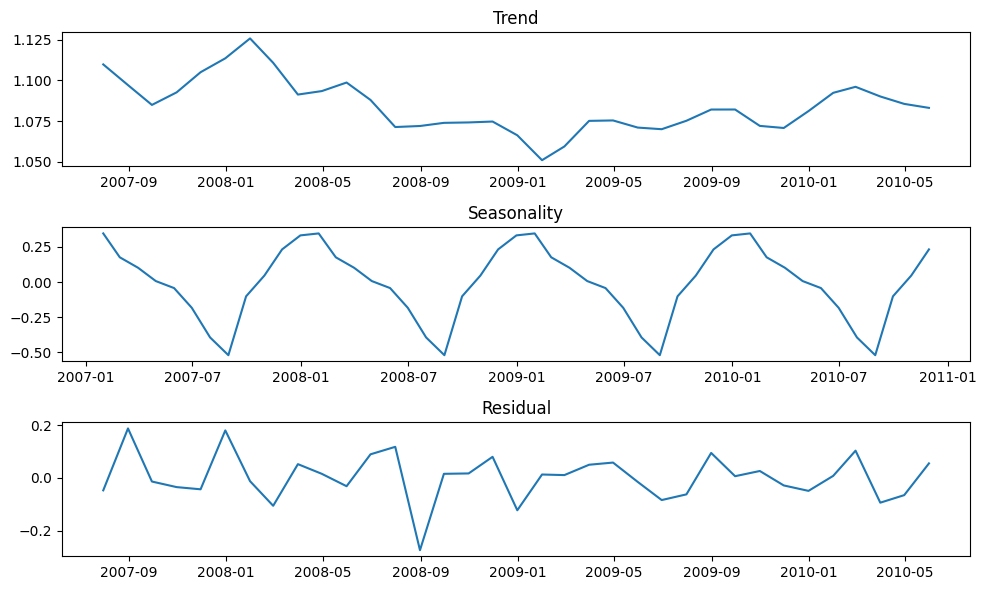

In [8]:
decompose(monthly, 12)

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.031
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -4.47 (1%), -3.29 (5%), -2.77 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -12.051
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -4.14 (1%), -3.15 (5%), -2.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


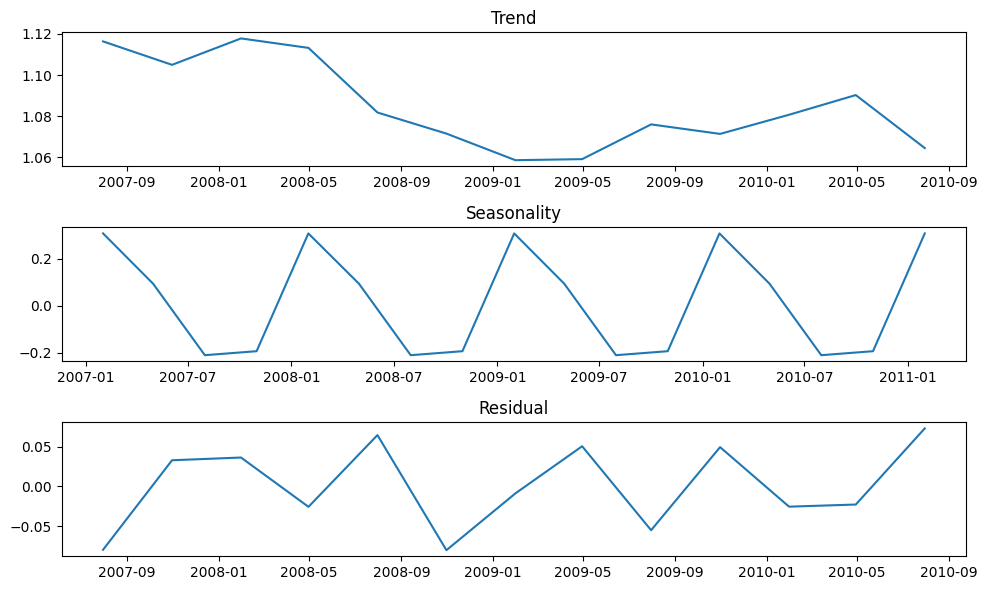

In [9]:
decompose(quarterly, 4)

In [10]:
def test_arima(timeseries):
    order_values = [(p, d, q) for p in range(4) for d in range(2) for q in range(4)]
    best_aicc = float('inf')
    best_order = None

    for order in order_values:
        try:
            model = ARIMA(timeseries, order=order)
            results = model.fit()
            aicc = results.aicc
            if aicc < best_aicc:
                best_aicc = aicc
                best_order = order
        except:
            continue
    
    return best_order, best_aicc


In [11]:
print("Best daily ARIMA parameters & AICC:")
test_arima(daily)

Best daily ARIMA parameters & AICC:


((3, 1, 3), 464.3120959140648)

In [12]:
print("Best weekly ARIMA parameters & AICC:")
test_arima(weekly)

Best weekly ARIMA parameters & AICC:


((1, 0, 1), -63.06816852405515)

In [13]:
print("Best monthly ARIMA parameters & AICC:")
test_arima(monthly)

Best monthly ARIMA parameters & AICC:


((3, 0, 1), -29.22398956491258)

In [14]:
print("Best quarterly ARIMA parameters & AICC:")
test_arima(quarterly)

Best quarterly ARIMA parameters & AICC:


((3, 0, 0), -12.937640011469115)